In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [43]:
xlsx_path = '/Users/baileyng/MIND_data/Cognitive Model Results (Formatted).xlsx'
sheets = pd.read_excel(xlsx_path, sheet_name=None)

In [44]:
model_col = 'Model'
r2_col = 'R-squared'
std_col = 'R-squared (std)'

print(sheets.keys())

dict_keys(['GF', 'PAL', 'DSST', 'TMT'])


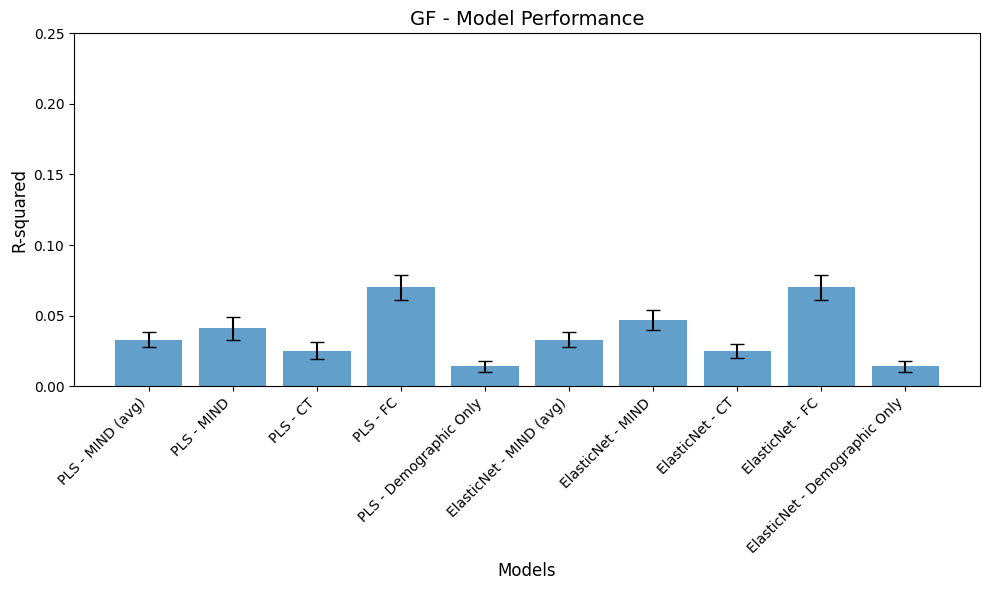

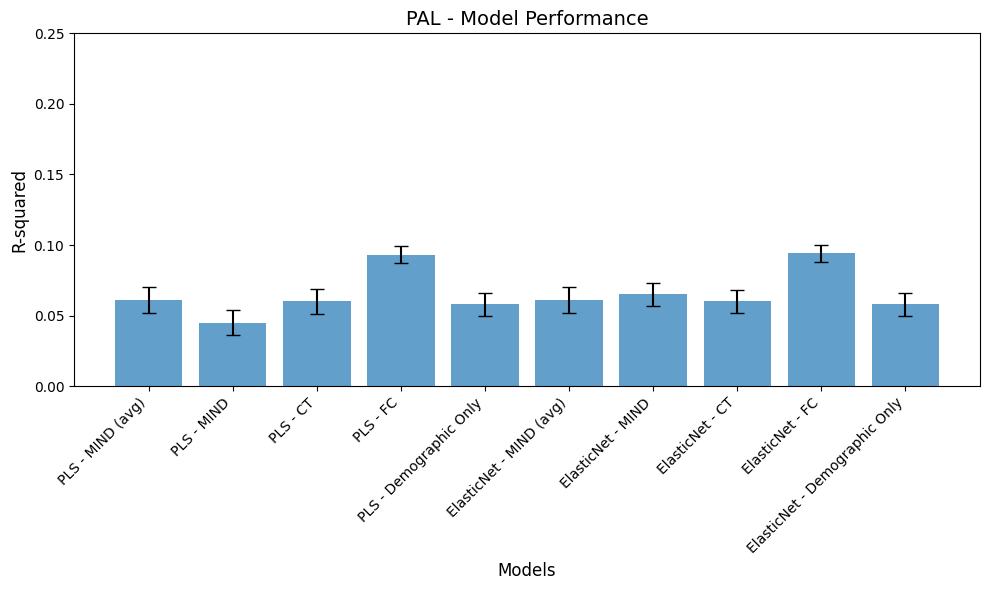

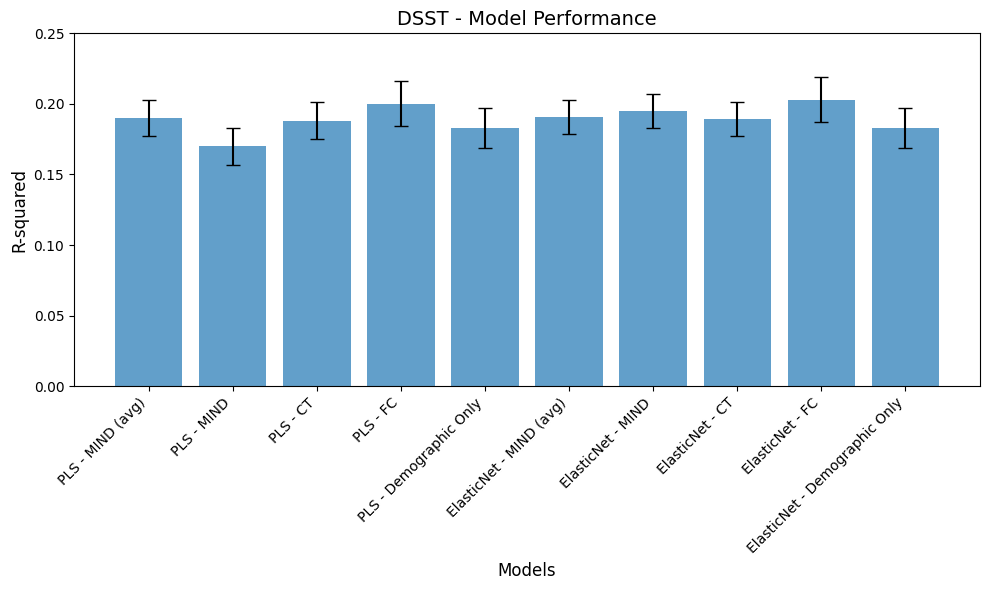

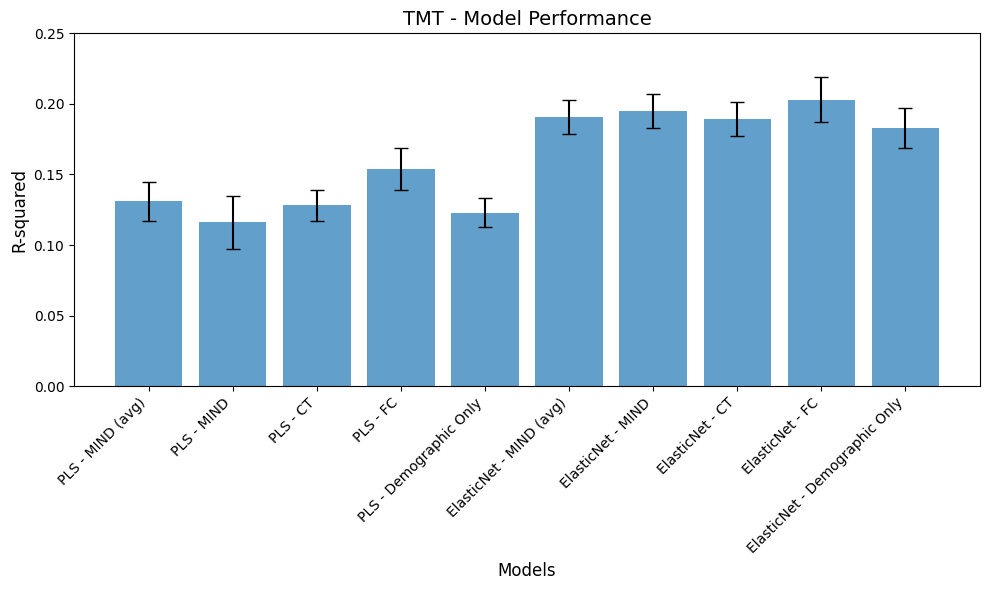

In [60]:
for sheet_name, df in sheets.items():
    plt.figure(figsize=(10, 6))

    models = df[model_col]
    r2_values = df[r2_col]
    r2_std = df[std_col]

    plt.bar(range(len(models)), r2_values, yerr=r2_std, capsize=5, alpha=0.7)
    plt.ylim(0, 0.25)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('R-squared', fontsize=12)
    plt.title(f'{sheet_name} - Model Performance', fontsize=14)
    plt.xticks(range(len(models)), models, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()